In [1]:
import urllib
import numpy as np
import os
import json
# import scipy as sp
from sklearn import svm
from sklearn.svm import LinearSVC
from scipy import stats
from sklearn.decomposition import PCA as RandomizedPCA
from sklearn.preprocessing import MinMaxScaler


## Load RTs

In [2]:
model_dir = 'model_02.11_2'
rnn_path = '/mnt/raid/ni/agnessa/rcnn-sat/'
path_rt = rnn_path+model_dir
entropy_thresh = 0.07
rts = np.load(os.path.join(path_rt,'reaction_time_entropy_th_{}.npy'.format(entropy_thresh)))

## SVM

In [3]:
def run_svm(x_train,y_train,x_test):
    clf = svm.SVC(kernel='linear', C=1000)
    print('Training')
    clf.fit(x_train, y_train) 
    print('Evaluating')
    distances = clf.decision_function(x_test)

    return distances

## PCA

In [ ]:
# def run_pca(activations,num_components):
#     np.random.seed(0)   
#     scaler = MinMaxScaler(feature_range=[0 ,1]) #normalize
#     activs_scaled = scaler.fit_transform(activations)
#     pca = RandomizedPCA(n_components = num_components)
#     pca_results = pca.fit_transform(activs_scaled)
    
#     return pca_results

## Run DTH on PCA-reduced activations

In [ ]:
# #define x train
# # for a specific layer and tp:
# #  load the num_images x num_features activations vector
# #  this is your x_train
# #  del the activations variable

# train_activ_path_pca = rnn_path+model_dir+'/train_activations/pca'
# test_activ_path_pca = rnn_path+model_dir+'/test_activations/pca'
# size_train = 1200
# size_test = 60
# num_ps = 4 #num pseudoscenes - bins of scenes
# num_scenes_ps = size_train/num_ps 
# y_train_labels = [label for label in range(2) for reps in range(int(num_ps/2))] 
# num_layers = 7
# num_timepoints = 8
# distances = np.ones([num_layers,num_timepoints,size_test])
# distances[:] = np.nan
# dth_rt_corr = np.ones([num_layers,num_timepoints])
# dth_rt_corr_art = np.ones([num_layers,num_timepoints])
# dth_rt_corr_nat = np.ones([num_layers,num_timepoints])
# dth_rt_corr[:] = np.nan
# dth_rt_corr_art[:] = np.nan
# dth_rt_corr_nat[:] = np.nan

# for layer_idx in range(num_layers):
#     for timepoint in range(num_timepoints):
#         layer_time = 'ReLU_Layer_{}_Time_{}'.format(layer_idx,timepoint)
#         x_test_pca = np.load(os.path.join(test_activ_path_pca, '{}_activations_pca.npy'.format(layer_time)))
#         x_train_pca = np.load(os.path.join(train_activ_path_pca,'{}_activations_pca.npy'.format(layer_time)))
#         print('Loaded activations for layer',layer_time)

#         #group into pseudotrials
#         pseudoscenes_x_train = np.ones([4,x_train_pca.shape[1]])
#         pseudoscenes_x_train[:] = np.nan
#         for ps in range(4):
#             pseudoscenes_x_train[ps] = np.mean(x_train_pca[ps*300:(ps*300)+300,:])
#         print('Finished grouping')
#         print(pseudoscenes_x_train.shape[:])

#         #SVM: get distances
#         distances[layer_idx,timepoint,:] = abs(run_svm(pseudoscenes_x_train,y_train_labels,x_test_pca))
#         print('Finished SVM')

#         #run the correlation with RTs
#         dth_rt_corr[layer_idx,timepoint] = stats.spearmanr(np.squeeze(distances[layer_idx,timepoint,:]),rts)[0]
#         dth_rt_corr_art[layer_idx,timepoint] = stats.spearmanr(np.squeeze(distances[layer_idx,timepoint,0:30]),rts[0:30])[0]
#         dth_rt_corr_nat[layer_idx,timepoint] = stats.spearmanr(np.squeeze(distances[layer_idx,timepoint,30:]),rts[30:])[0]
        
#         print('Finished correlation')  
#         print('Correlation', dth_rt_corr[layer_idx,timepoint])
#         print('Correlation', dth_rt_corr_art[layer_idx,timepoint])
#         print('Correlation', dth_rt_corr_nat[layer_idx,timepoint])

# # save DTH results        
# path_dth_results = os.path.join(rnn_path+model_dir,'correlation_rt_{}_dth'.format(entropy_thresh))
# path_dth_results_art = os.path.join(rnn_path+model_dir,'correlation_rt_{}_dth_art'.format(entropy_thresh))
# path_dth_results_nat = os.path.join(rnn_path+model_dir,'correlation_rt_{}_dth_nat'.format(entropy_thresh))
# path_distances = os.path.join(rnn_path+model_dir,'distances_all_scenes'.format(entropy_thresh))

# np.save(path_dth_results,dth_rt_corr)
# np.save(path_dth_results_art,dth_rt_corr_art)
# np.save(path_dth_results_nat,dth_rt_corr_nat)
# np.save(path_distances,distances)

In [4]:
#define x train
# for a specific layer and tp:
#  load the num_images x num_features activations vector
#  this is your x_train
#  del the activations variable

# train_activ_path_pca = rnn_path+model_dir+'/train_activations/pca'
# test_activ_path_pca = rnn_path+model_dir+'/test_activations/pca'
all_activ_path = rnn_path+model_dir+'/normalized_nopca/activations'
size_train = 2400
size_test = 60
num_ps = 4 #num pseudoscenes - bins of scenes
num_scenes_ps = size_train/num_ps 
y_train_labels = [label for label in range(2) for reps in range(int(num_ps/2))] 
num_layers = 7
num_timepoints = 8
distances = np.ones([num_layers,num_timepoints,size_test])
distances[:] = np.nan
dth_rt_corr = np.ones([num_layers,num_timepoints])
dth_rt_corr_art = np.ones([num_layers,num_timepoints])
dth_rt_corr_nat = np.ones([num_layers,num_timepoints])
dth_rt_corr[:] = np.nan
dth_rt_corr_art[:] = np.nan
dth_rt_corr_nat[:] = np.nan

for layer_idx in range(num_layers):
    for timepoint in range(num_timepoints):
        layer_time = 'ReLU_Layer_{}_Time_{}'.format(layer_idx,timepoint)
#             x_test_pca = np.load(os.path.join(test_activ_path_pca, '{}_activations_pca.npy'.format(layer_time)))
        activs = np.load(os.path.join(all_activ_path,'{}_activations.npy'.format(layer_time)))
        x_train = activs[0:size_train,:]
        print('Shape train:',x_train.shape)
        x_test = activs[size_train:,:]
        print('Shape test:',x_test.shape)

        #group into pseudotrials
        pseudoscenes_x_train = np.ones([4,x_train.shape[1]])
        pseudoscenes_x_train[:] = np.nan
        for ps in range(4):
            pseudoscenes_x_train[ps] = np.mean(x_train[ps*300:(ps*300)+300,:])
        print('Finished grouping')
        print(pseudoscenes_x_train.shape[:])

        #SVM: get distances
        distances[layer_idx,timepoint,:] = abs(run_svm(pseudoscenes_x_train,y_train_labels,x_test))
        print('Finished SVM')

        #run the correlation with RTs
        dth_rt_corr[layer_idx,timepoint] = stats.spearmanr(np.squeeze(distances[layer_idx,timepoint,:]),rts)[0]
        dth_rt_corr_art[layer_idx,timepoint] = stats.spearmanr(np.squeeze(distances[layer_idx,timepoint,0:30]),rts[0:30])[0]
        dth_rt_corr_nat[layer_idx,timepoint] = stats.spearmanr(np.squeeze(distances[layer_idx,timepoint,30:]),rts[30:])[0]
        print('Finished correlation')  
        print('Correlation', dth_rt_corr[layer_idx,timepoint])
        print('Correlation', dth_rt_corr_art[layer_idx,timepoint])
        print('Correlation', dth_rt_corr_nat[layer_idx,timepoint])


# save DTH results        
path_dth_results = os.path.join(rnn_path+model_dir+'/normalized_nopca/','correlation_rt_{}_dth'.format(entropy_thresh))
path_dth_results_art = os.path.join(rnn_path+model_dir+'/normalized_nopca/','correlation_rt_{}_dth_art'.format(entropy_thresh))
path_dth_results_nat = os.path.join(rnn_path+model_dir+'/normalized_nopca/','correlation_rt_{}_dth_nat'.format(entropy_thresh))
path_distances = os.path.join(rnn_path+model_dir+'/normalized_nopca/','distances_all_scenes'.format(entropy_thresh))

np.save(path_dth_results,dth_rt_corr)
np.save(path_dth_results_art,dth_rt_corr_art)
np.save(path_dth_results_nat,dth_rt_corr_nat)
np.save(path_distances,distances)

Shape train: (2400, 1572864)
Shape test: (60, 1572864)
Finished grouping
(4, 1572864)
Training
Evaluating
Finished SVM
Finished correlation
Correlation 0.20794980513231148
Correlation 0.46426903380368345
Correlation -0.08640143487160531
Shape train: (2400, 1572864)
Shape test: (60, 1572864)
Finished grouping
(4, 1572864)
Training
Evaluating
Finished SVM
Finished correlation
Correlation 0.2252708616083798
Correlation 0.5111927768159462
Correlation -0.022096918688427798
Shape train: (2400, 1572864)
Shape test: (60, 1572864)
Finished grouping
(4, 1572864)
Training
Evaluating
Finished SVM
Finished correlation
Correlation -0.0031080774237430956
Correlation -0.10350825664469755
Correlation 0.03202811809895714
Shape train: (2400, 1572864)
Shape test: (60, 1572864)
Finished grouping
(4, 1572864)
Training
Evaluating
Finished SVM
Finished correlation
Correlation 0.059571483955076
Correlation 0.14187531710766546
Correlation -0.00943463944000288
Shape train: (2400, 1572864)
Shape test: (60, 157286

Shape train: (2400, 32768)
Shape test: (60, 32768)
Finished grouping
(4, 32768)
Training
Evaluating
Finished SVM
Finished correlation
Correlation 0.11289443725616848
Correlation -0.13304261254065122
Correlation 0.16336823030320774
Shape train: (2400, 32768)
Shape test: (60, 32768)
Finished grouping
(4, 32768)
Training
Evaluating
Finished SVM
Finished correlation
Correlation 0.1938663293059756
Correlation 0.21695330592728607
Correlation 0.11445707320635072
Shape train: (2400, 32768)
Shape test: (60, 32768)
Finished grouping
(4, 32768)
Training
Evaluating
Finished SVM
Finished correlation
Correlation 0.22268079708859387
Correlation 0.1650611665960777
Correlation 0.17677534950742238
Shape train: (2400, 32768)
Shape test: (60, 32768)
Finished grouping
(4, 32768)
Training
Evaluating
Finished SVM
Finished correlation
Correlation -0.07948260495093022
Correlation -0.26636124709902165
Correlation 0.03848339771580122
Shape train: (2400, 16384)
Shape test: (60, 16384)
Finished grouping
(4, 16384)

In [ ]:
all_activ_path

In [ ]:
np.argwhere(np.isnan(activs))

In [ ]:
activs[0,82]

In [ ]:
all_activ_path

## Plot

In [ ]:
# model_dir = 'model_22.08'
# rnn_path = '/mnt/raid/ni/agnessa/rcnn-sat/'
# path_rt = rnn_path+model_dir
# dth_rt_corr = np.load(os.path.join(path_rt,'correlation_rt_0.09_dth.npy'))
# dth_rt_corr_art = np.load(os.path.join(path_rt,'correlation_rt_0.09_dth_art.npy'))
# dth_rt_corr_nat = np.load(os.path.join(path_rt,'correlation_rt_0.09_dth_nat.npy'))

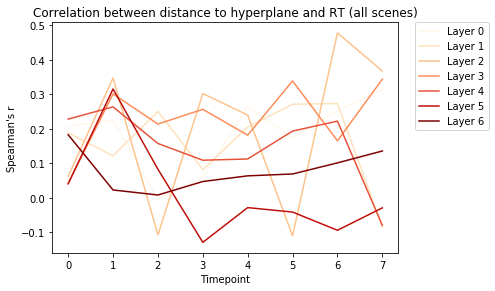

In [6]:
import matplotlib.pyplot as plt

#all scenes
num_layers = 7
cm = plt.get_cmap('OrRd')
colors = cm(np.linspace(0,1,num_layers))

fig = plt.figure()
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])

for layer in range(num_layers):
    ax.plot(dth_rt_corr[layer,:],label='Layer {}'.format(layer),color=colors[layer])
    
ax.set(xlabel='Timepoint', ylabel='Spearman\'s r',
   title='Correlation between distance to hyperplane and RT (all scenes)')

ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

figname_svg = os.path.join(rnn_path+model_dir+'/normalized_nopca/','dth_rt_{}_corr_all_scenes.svg'.format(entropy_thresh))
figname_png = os.path.join(rnn_path+model_dir+'/normalized_nopca/','dth_rt_{}_corr_all_scenes.png'.format(entropy_thresh))

fig.savefig(figname_svg,bbox_inches='tight') #to make sure the legend is not cut off 
fig.savefig(figname_png,bbox_inches='tight')



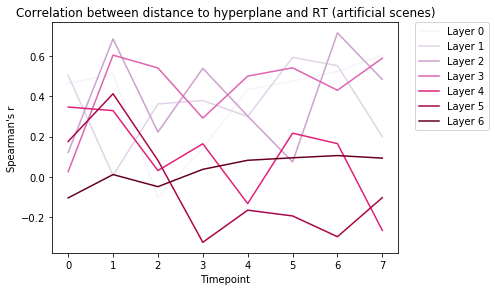

In [7]:
#artificial scenes

cm = plt.get_cmap('PuRd')
colors = cm(np.linspace(0,1,num_layers))

fig = plt.figure()
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])

for layer in range(num_layers):
    ax.plot(dth_rt_corr_art[layer,:],label='Layer {}'.format(layer),color=colors[layer])
    
ax.set(xlabel='Timepoint', ylabel='Spearman\'s r',
   title='Correlation between distance to hyperplane and RT (artificial scenes)')

ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

figname_svg = os.path.join(rnn_path+model_dir+'/normalized_nopca/','dth_rt_{}_corr_artificial.svg'.format(entropy_thresh))
figname_png = os.path.join(rnn_path+model_dir+'/normalized_nopca/','dth_rt_{}_corr_artificial.png'.format(entropy_thresh))

fig.savefig(figname_svg,bbox_inches='tight') #to make sure the legend is not cut off 
fig.savefig(figname_png,bbox_inches='tight')

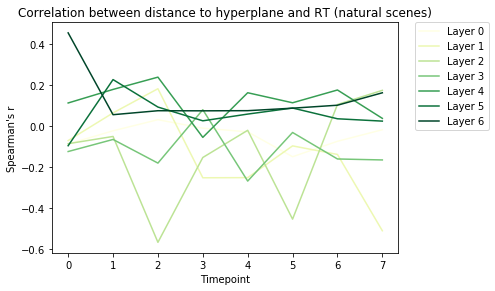

In [8]:
#natural scenes

cm = plt.get_cmap('YlGn')
colors = cm(np.linspace(0,1,num_layers))

fig = plt.figure()
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])

for layer in range(num_layers):
    ax.plot(dth_rt_corr_nat[layer,:],label='Layer {}'.format(layer),color=colors[layer])
    
ax.set(xlabel='Timepoint', ylabel='Spearman\'s r',
   title='Correlation between distance to hyperplane and RT (natural scenes)')

ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

figname_svg = os.path.join(rnn_path+model_dir+'/normalized_nopca/','dth_rt_{}_corr_natural.svg'.format(entropy_thresh))
figname_png = os.path.join(rnn_path+model_dir+'/normalized_nopca/','dth_rt_{}_corr_natural.png'.format(entropy_thresh))

fig.savefig(figname_svg,bbox_inches='tight') #to make sure the legend is not cut off 
fig.savefig(figname_png,bbox_inches='tight')

In [ ]:
#If the load function gives an error, do this
# np_load_old = np.load # modify the default parameters of np.load
# np.load = lambda *a,**k: np_load_old(*a, allow_pickle=True, **k)
# t = np.load('model_06.08/ReLU_Layer_1_Time_1_activations.npy') #test
# np.load = np_load_old

In [ ]:
mat = np.load('/mnt/raid/ni/agnessa/rcnn-sat/model_22.08/normalized_nopca/Input_RDM/ReLU_Layer_0_Time_0_Input_RDM.npy')

In [ ]:
import seaborn

fig = plt.figure(figsize=(17,13))
ax = seaborn.heatmap(mat, cmap='rainbow', vmin=0.0, vmax=1.0)

In [ ]:
mat2 = np.load('/mnt/raid/ni/agnessa/rcnn-sat/model_22.08/normalized_nopca/Input_RDM/ReLU_Layer_0_Time_0_Input_RDM_method2.npy')

In [ ]:
fig = plt.figure(figsize=(17,13))
ax = seaborn.heatmap(mat2, cmap='rainbow', vmin=0.0, vmax=1.0)

In [ ]:
mat2